In [1]:
import pickle
import argparse
import asyncio
import json
import os
import time
import json
import requests
from collections import defaultdict
from urllib.error import HTTPError
from urllib.parse import quote_plus
from Bio import Entrez

from openai import OpenAI, AsyncOpenAI


In [36]:
with open("/Users/yiquntchen/Downloads/test-4o-full-test-negated-dataset.jsonl", "r") as f:
    question_data = [json.loads(line) for line in f]

In [39]:
question_data[0]

{'doi': '10.1002/14651858.CD006659.PUB3',
 'question': 'Is carnitine supplementation considered ineffective and unsafe for treating inborn errors of metabolism?',
 'answer': 'No Evidence',
 'original_question': 'Is carnitine supplementation considered effective and safe for treating inborn errors of metabolism?',
 'original_answer': 'No Evidence',
 'evidence-quality': 'Very Low',
 'discrepancy': 'Missing',
 'negation-valid': True}

In [6]:
import pandas as pd
import json

# Read the CSV file
csv_path = "/Users/yiquntchen/Downloads/test-temp-4o-mini-async.csv"  # Replace with your CSV file path
df = pd.read_csv(csv_path)

# Ensure 'doi' column exists
if 'doi' not in df.columns:
    raise ValueError("CSV must contain a 'doi' column.")

# Set 'doi' as the index and convert to dictionary
json_dict = df.to_dict(orient='index')

# Save to JSON
json_path = "/Users/yiquntchen/Downloads/test-temp-4o-mini-async.json"  # Replace with desired output path
with open(json_path, 'w') as f:
    json.dump(json_dict, f, indent=2)

print(f"Saved JSON to {json_path}")

Saved JSON to /Users/yiquntchen/Downloads/test-temp-4o-mini-async.json


In [10]:
import pickle

with open("/Users/yiquntchen/Downloads/gpt4o-temp-results-one-netry.pkl", 'rb') as f:
    gpt4o_result = pickle.load(f)

In [54]:
len(gpt4o_result)

8533

In [21]:
json_path = "/Users/yiquntchen/Downloads/test-temp-4o-one-question-async.json"  # Replace with desired output path
with open(json_path, 'w') as f:
    json.dump(converted_dict, f, indent=2)

In [7]:
len(json_dict)

34132

In [19]:
converted_dict = {}

for i, (doi, entry) in enumerate(gpt4o_result.items()):
    converted_dict[i] = {
        "doi": doi,
        "question": entry.get("question", ""),
        "answer": entry.get("answer", ""),
        "evidence-quality": entry.get("evidence-quality", ""),
        "discrepancy": entry.get("discrepancy", ""),
        "notes": entry.get("notes", ""),
        "abstract": None,
        "publication_year": None
    }

In [23]:
json_path = "/Users/yiquntchen/Downloads/test_4o_mini_on_4o_questions_with_predictions.json"  # Replace with desired output path
with open(json_path, 'rb') as f:
    result_4o_mini_on_4o_Q = json.load(f)

In [5]:
json_path = "/Users/yiquntchen/Downloads/clean_pubmed_abstract_data_no_protocol.pkl"  # Replace with desired output path
with open(json_path, 'rb') as f:
    clean_pubmed_abstract_data_no_protocol = pickle.load(f)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Sample data (replace or extend with your actual responses)
data = result_4o_mini_on_4o_Q

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(data, orient="index")
df.index.name = "qid"
df.reset_index(inplace=True)

# Create binary match indicators for analysis
df["answer_match"] = df["model_answer"] == df["ground_truth_answer"]
df["discrepancy_match"] = df["model_discrepancy"] == df["ground_truth_discrepancy"]
df["evidence_quality_match"] = df["model_evidence-quality"] == df["ground_truth_evidence-quality"]

# ---------------------------
# 1. Summary Tables
# ---------------------------

# Overall accuracy summary
summary_table = pd.DataFrame({
    "Metric": ["Answer Accuracy", "Discrepancy Accuracy", "Evidence Quality Accuracy"],
    "Accuracy": [
        df["answer_match"].mean(),
        df["discrepancy_match"].mean(),
        df["evidence_quality_match"].mean()
    ]
})

print("Summary Accuracy Table")
print(summary_table.to_string(index=False))
print("\n")


NameError: name 'result_4o_mini_on_4o_Q' is not defined

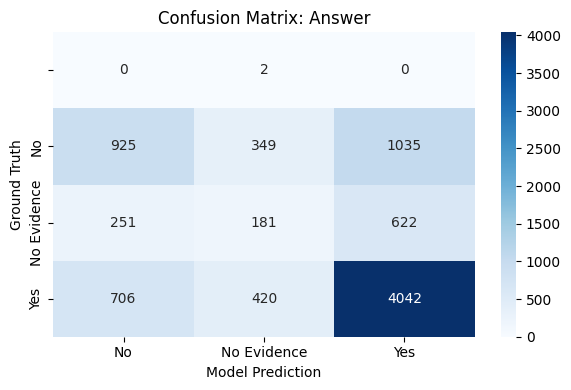

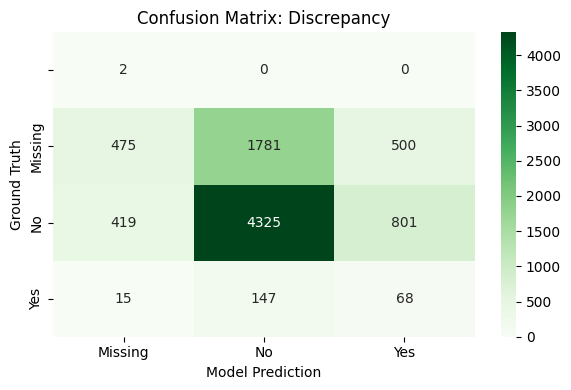

In [37]:

# ---------------------------
# 2. Confusion Matrices
# ---------------------------

# Confusion matrix for the answer field
answer_cm = pd.crosstab(df["ground_truth_answer"], df["model_answer"], rownames=['Ground Truth'], colnames=['Model Prediction'])
plt.figure(figsize=(6, 4))
sns.heatmap(answer_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: Answer")
plt.tight_layout()
plt.show()

# Confusion matrix for the discrepancy field
discrepancy_cm = pd.crosstab(df["ground_truth_discrepancy"], df["model_discrepancy"], rownames=['Ground Truth'], colnames=['Model Prediction'])
plt.figure(figsize=(6, 4))
sns.heatmap(discrepancy_cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix: Discrepancy")
plt.tight_layout()
plt.show()


In [38]:

# ---------------------------
# 3. Classification Reports
# ---------------------------

# Classification report for answer
report_answer = classification_report(df["ground_truth_answer"], df["model_answer"], output_dict=True)
report_answer_df = pd.DataFrame(report_answer).transpose()
print("Classification Report: Answer")
print(report_answer_df.to_string())
print("\n")

# Classification report for discrepancy
report_discrepancy = classification_report(df["ground_truth_discrepancy"], df["model_discrepancy"], output_dict=True)
report_discrepancy_df = pd.DataFrame(report_discrepancy).transpose()
print("Classification Report: Discrepancy")
print(report_discrepancy_df.to_string())
print("\n")


/Users/yiquntchen/opt/miniconda3/envs/research/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yiquntchen/opt/miniconda3/envs/research/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yiquntchen/opt/miniconda3/envs/research/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

Classification Report: Answer
              precision    recall  f1-score      support
               0.000000  0.000000  0.000000     2.000000
No             0.491498  0.400606  0.441422  2309.000000
No Evidence    0.190126  0.171727  0.180459  1054.000000
Yes            0.709247  0.782121  0.743904  5168.000000
accuracy       0.603305  0.603305  0.603305     0.603305
macro avg      0.347718  0.338613  0.341446  8533.000000
weighted avg   0.586037  0.603305  0.592282  8533.000000


Classification Report: Discrepancy
              precision    recall  f1-score      support
               0.000000  0.000000  0.000000     2.000000
Missing        0.521405  0.172351  0.259067  2756.000000
No             0.691668  0.779982  0.733175  5545.000000
Yes            0.049671  0.295652  0.085053   230.000000
accuracy       0.570491  0.570491  0.570491     0.570491
macro avg      0.315686  0.311996  0.269324  8533.000000
weighted avg   0.619210  0.570491  0.562406  8533.000000




/Users/yiquntchen/opt/miniconda3/envs/research/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yiquntchen/opt/miniconda3/envs/research/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
meta_df.head(2)

,pubmed_id,title,abstract,authors,publication_year,citation_count,journal,s2_id,publication_date,doi,source
doi,,,,,,,,,,,
10.1002/14651858.CD008285,20091664,Reducing uncertainties about the effects of ch...,After a 1999 National Cancer Institute (NCI) c...,"[{'name': 'Unknown', 'affiliations': ['See lis...",2010-1-20,48.0,Cochrane Database of Systematic Reviews,NaN,NaN,NaN,NaN
10.1002/14651858.CD000057.PUB2,20091498,Clomiphene citrate for unexplained subfertilit...,The effectiveness of clomiphene citrate has be...,"[{'name': 'Edward Hughes', 'affiliations': ['D...",2010-1-20,36.0,Cochrane Database of Systematic Reviews,NaN,NaN,NaN,NaN


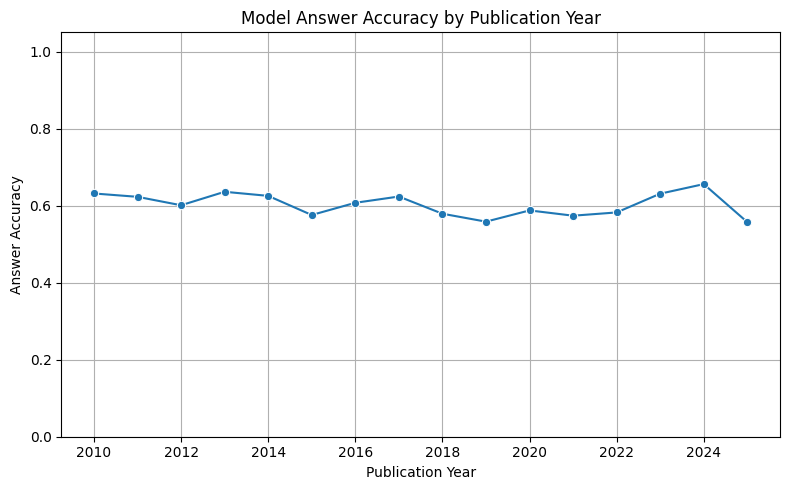

In [45]:

# ---------------------------
# 4. Extended Analysis with Metadata
# ---------------------------
# Suppose you have additional metadata (e.g., publication_year and citation_count) indexed by DOI.
# We simulate a metadata dictionary below. In practice, this may be merged on the 'doi' field.

metadata_dict = clean_pubmed_abstract_data_no_protocol

# Convert metadata to a DataFrame
meta_df = pd.DataFrame.from_dict(metadata_dict, orient="index")
meta_df.index.name = "doi"

# If the 'doi' column already exists in meta_df, drop it before resetting the index.
if "doi" in meta_df.columns:
    meta_df = meta_df.drop(columns=["doi"])

meta_df.reset_index(inplace=True)

# Convert 'publication_year' to datetime and extract the year
meta_df["publication_year"] = pd.to_datetime(meta_df["publication_year"], errors='coerce')
meta_df["pub_year"] = meta_df["publication_year"].dt.year

# Merge the metadata into the main DataFrame (which already contains a 'doi' column)
merged_df = pd.merge(df, meta_df, on="doi", how="left")

# Recalculate answer_match in case it's needed after merge
merged_df["answer_match"] = merged_df["model_answer"] == merged_df["ground_truth_answer"]

# Analyze accuracy by publication year
year_accuracy = merged_df.groupby("pub_year")["answer_match"].mean().reset_index()
year_accuracy.columns = ["Publication Year", "Answer Accuracy"]

plt.figure(figsize=(8, 5))
sns.lineplot(data=year_accuracy, x="Publication Year", y="Answer Accuracy", marker="o")
plt.title("Model Answer Accuracy by Publication Year")
plt.ylim(0, 1.05)
plt.grid(True)
plt.tight_layout()
plt.show()

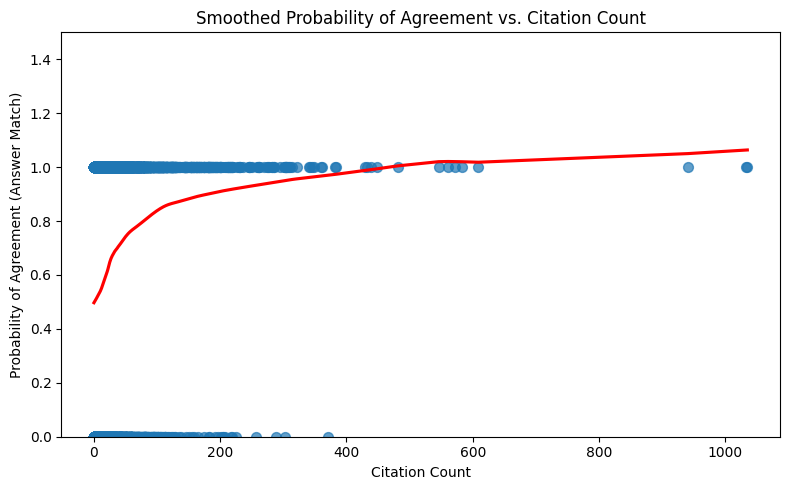

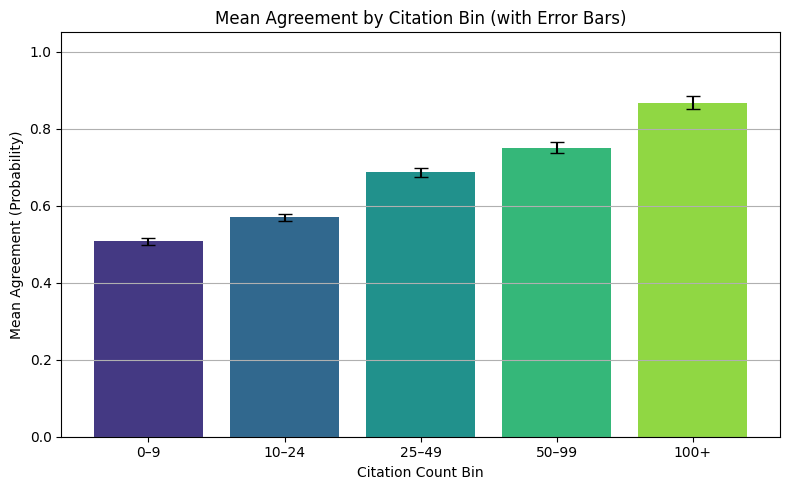

Binned Citation Accuracy with Standard Error:
citation_bin     mean      sem  count
         0–9 0.507081 0.009293   2895
       10–24 0.569544 0.009615   2653
       25–49 0.686217 0.011241   1705
       50–99 0.750288 0.014692    869
        100+ 0.867374 0.017491    377

Correlation Tests between Citation Count and Answer Agreement:
Pearson Correlation: 0.165 (p-value: 1.19e-52)
Spearman Correlation: 0.194 (p-value: 1.38e-72)


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr, spearmanr

# --- Assume merged_df has been created from your main DataFrame (with a doi column)
# and merged with meta_df as in previous steps. Ensure merged_df has these columns:
# 'citation_count' (numeric), 'answer_match' (boolean), and 'pub_year'

# Convert answer_match boolean to numeric (True->1, False->0)
merged_df["answer_match_numeric"] = merged_df["answer_match"].astype(int)

# -----------------------------------------------------------
# 1. Plot smoothed probability of agreement vs. citation count
# -----------------------------------------------------------
plt.figure(figsize=(8, 5))
sns.regplot(data=merged_df, x="citation_count", y="answer_match_numeric", lowess=True, 
            scatter_kws={'s':50, 'alpha':0.7}, line_kws={'color': 'red'})
plt.title("Smoothed Probability of Agreement vs. Citation Count")
plt.xlabel("Citation Count")
plt.ylabel("Probability of Agreement (Answer Match)")
plt.ylim(0, 1.5)
plt.tight_layout()
plt.show()

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define citation bins
bins = [0, 10, 25, 50, 100, np.inf]
labels = ["0–9", "10–24", "25–49", "50–99", "100+"]

# Bin citation counts
merged_df["citation_bin"] = pd.cut(
    merged_df["citation_count"],
    bins=bins,
    labels=labels,
    right=False
)

# Group by citation bin and compute mean + standard error
citation_bin_stats = merged_df.groupby("citation_bin", observed=True)["answer_match_numeric"].agg(
    mean="mean",
    count="count",
    std="std"
).reset_index()

# Compute standard error and handle empty bins gracefully
citation_bin_stats["sem"] = citation_bin_stats["std"] / np.sqrt(citation_bin_stats["count"])
citation_bin_stats["sem"] = citation_bin_stats["sem"].fillna(0)  # Replace NaN sem for empty bins

# Plot bar chart with error bars manually using matplotlib
plt.figure(figsize=(8, 5))
bars = plt.bar(
    citation_bin_stats["citation_bin"].astype(str),
    citation_bin_stats["mean"],
    yerr=citation_bin_stats["sem"],
    capsize=5,
    color=sns.color_palette("viridis", len(citation_bin_stats))
)
plt.title("Mean Agreement by Citation Bin (with Error Bars)")
plt.xlabel("Citation Count Bin")
plt.ylabel("Mean Agreement (Probability)")
plt.ylim(0, 1.05)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Print stats table
print("Binned Citation Accuracy with Standard Error:")
print(citation_bin_stats[["citation_bin", "mean", "sem", "count"]].to_string(index=False))


# -----------------------------------------------------------
# 3. Correlation Test: Citation Count vs. Accuracy
# -----------------------------------------------------------
# Ensure citation_count is numeric
merged_df["citation_count"] = pd.to_numeric(merged_df["citation_count"], errors="coerce")

# Drop any rows with missing values in citation_count or answer_match_numeric
corr_df = merged_df.dropna(subset=["citation_count", "answer_match_numeric"])

# Pearson correlation
pearson_corr, pearson_p = pearsonr(corr_df["citation_count"], corr_df["answer_match_numeric"])
# Spearman correlation
spearman_corr, spearman_p = spearmanr(corr_df["citation_count"], corr_df["answer_match_numeric"])

print("\nCorrelation Tests between Citation Count and Answer Agreement:")
print("Pearson Correlation: {:.3f} (p-value: {:.3g})".format(pearson_corr, pearson_p))
print("Spearman Correlation: {:.3f} (p-value: {:.3g})".format(spearman_corr, spearman_p))

In [49]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np 

# Prepare clean dataset
logit_df = merged_df.dropna(subset=["citation_count", "answer_match_numeric"]).copy()

# Fit logistic regression model
logit_model = smf.logit("answer_match_numeric ~ citation_count", data=logit_df).fit()

# Print model summary
print(logit_model.summary())

# Optional: Odds ratio + 95% CI
odds_ratios = pd.DataFrame({
    "OR": logit_model.params.apply(lambda x: np.exp(x)),
    "2.5%": logit_model.conf_int()[0].apply(lambda x: np.exp(x)),
    "97.5%": logit_model.conf_int()[1].apply(lambda x: np.exp(x)),
})
print("\nOdds Ratios with 95% CI:")
print(odds_ratios)

Optimization terminated successfully.
         Current function value: 0.650916
         Iterations 6
                            Logit Regression Results                            
Dep. Variable:     answer_match_numeric   No. Observations:                 8499
Model:                            Logit   Df Residuals:                     8497
Method:                             MLE   Df Model:                            1
Date:                  Thu, 03 Apr 2025   Pseudo R-squ.:                 0.03083
Time:                          23:33:41   Log-Likelihood:                -5532.1
converged:                         True   LL-Null:                       -5708.1
Covariance Type:              nonrobust   LLR p-value:                 1.561e-78
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0605      0.030      1.994      0.046       0.001       0.120
c

In [ ]:
# help me write code to generate separate openai embeddings for the title and abstract fiels of clean_pubmed_abstract_data_no_protocol (ikeyed by doi, both fields are then keys to that dict element), cluster the embeddings and visualize the resulting embedding
# color the visualized embeddings using publication year (just take year, it could be either 2010 or 2010-01-01 formatas) and by citation counts

In [2]:
import openai
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [3]:
import tqdm

In [ ]:

# Initialize dictionaries for embeddings (or load from file if you already have partial data)
title_embedding_data = {}    # Key: doi, Value: embedding info for title
abstract_embedding_data = {} # Key: doi, Value: embedding info for abstract


In [8]:
# Set your OpenAI API key if not already set in your environment
client = OpenAI(api_key=api_key) 

import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def get_embedding(client, text, model="text-embedding-3-large"):
    """
    Get an embedding for the provided text using the OpenAI API.
    """
    # Calling the OpenAI API for a single text input
    response = client.embeddings.create(input=text, model=model)
    embedding = response.data[0].embedding
    return embedding
try:
    for doi, record in tqdm.tqdm(clean_pubmed_abstract_data_no_protocol.items()):
        # Skip DOI if already processed (optional)
        if doi in title_embedding_data and doi in abstract_embedding_data:
            continue

        title = record.get("title", "")
        abstract = record.get("abstract", "")
        
        # Generate embeddings for title and abstract separately
        title_embedding = get_embedding(client, title)
        abstract_embedding = get_embedding(client, abstract)
        
        # Process the year field (extract first 4 digits as integer)
        year_raw = record.get("year", None)
        if year_raw is not None:
            year_str = str(year_raw)[:4]
            try:
                year = int(year_str)
            except ValueError:
                year = None
        else:
            year = None
        
        # Get citation count (defaulting to None if missing)
        citation_count = record.get("citation_count", None)
        
        # Save embeddings keyed by DOI
        title_embedding_data[doi] = {
            "embedding": title_embedding,
            "year": year,
            "citation_count": citation_count
        }
        abstract_embedding_data[doi] = {
            "embedding": abstract_embedding,
            "year": year,
            "citation_count": citation_count
        }

except KeyboardInterrupt:
    print("Embedding loop interrupted by user. Partial results have been saved in the dictionaries.")

100%|█████████████████████████████████████| 8533/8533 [1:48:37<00:00,  1.31it/s]


In [11]:
with open("/Users/yiquntchen/Downloads/text-embedding-model3-title.pkl", 'wb') as f:
    pickle.dump(title_embeddings, f)

with open("/Users/yiquntchen/Downloads/text-embedding-model3-abstract.pkl", 'wb') as f:
    pickle.dump(abstract_embeddings, f)

In [9]:
# Convert title embeddings to a NumPy array (if needed)
title_embeddings = np.array([entry["embedding"] for entry in title_embedding_data.values()])

# Convert abstract embeddings to a NumPy array (if needed)
abstract_embeddings = np.array([entry["embedding"] for entry in abstract_embedding_data.values()])

In [13]:
# Cluster the title embeddings
title_kmeans = KMeans(n_clusters=10, random_state=42)
title_clusters = title_kmeans.fit_predict(title_embeddings)

# Cluster the abstract embeddings
abstract_kmeans = KMeans(n_clusters=10, random_state=42)
abstract_clusters = abstract_kmeans.fit_predict(abstract_embeddings)

# Add cluster labels back to the data
for idx, entry in enumerate(title_embedding_data.values()):
    entry["cluster"] = title_clusters[idx]

for idx, entry in enumerate(abstract_embedding_data.values()):
    entry["cluster"] = abstract_clusters[idx]

# Dimensionality reduction for title embeddings
title_tsne = TSNE(n_components=2, random_state=42)
title_embeddings_2d = title_tsne.fit_transform(title_embeddings)

# Dimensionality reduction for abstract embeddings
abstract_tsne = TSNE(n_components=2, random_state=42)
abstract_embeddings_2d = abstract_tsne.fit_transform(abstract_embeddings)


TypeError: 'str' object does not support item assignment

In [14]:

# Store 2D coordinates
for idx, entry in enumerate(title_embedding_data.values()):
    entry["x"] = title_embeddings_2d[idx, 0]
    entry["y"] = title_embeddings_2d[idx, 1]

for idx, entry in enumerate(abstract_embedding_data.values()):
    entry["x"] = abstract_embeddings_2d[idx, 0]
    entry["y"] = abstract_embeddings_2d[idx, 1]

# Convert to DataFrames
title_df = pd.DataFrame(title_embedding_data)
abstract_df = pd.DataFrame(abstract_embedding_data)

# Add a source column to distinguish the data source
title_df['source'] = 'title'
abstract_df['source'] = 'abstract'

In [17]:
title_df = title_df.T

In [18]:
title_df

,embedding,year,citation_count,cluster,x,y
10.1002/14651858.CD008285,"[-0.005612277425825596, 0.007086985278874636, ...",None,48,9,-74.646599,-9.332312
10.1002/14651858.CD000057.PUB2,"[-0.0021402831189334393, -0.004524633754044771...",None,36,4,-67.003036,-57.678398
10.1002/14651858.CD006782.PUB2,"[0.03905339539051056, 0.020498614758253098, -0...",None,27,0,-44.464645,69.375252
10.1002/14651858.CD003278.PUB2,"[0.02815551869571209, 0.01748400554060936, -0....",None,16,7,23.03936,25.630529
10.1002/14651858.CD006624.PUB2,"[0.029207076877355576, 0.014603538438677788, -...",None,15,3,76.1129,51.043427
...,...,...,...,...,...,...
10.1002/14651858.CD006027.PUB3,"[0.022154362872242928, -0.027364905923604965, ...",None,0,6,-10.574682,41.341366
10.1002/14651858.CD014802.PUB2,"[-0.021263374015688896, 0.02421252429485321, -...",None,0,1,-26.639446,15.831101
10.1002/14651858.CD010533.PUB3,"[-0.009089136496186256, -0.010466485284268856,...",None,0,9,-74.947525,-6.986701
10.1002/14651858.CD014796.PUB2,"[0.03059997223317623, 0.057914234697818756, -0...",None,0,8,79.669586,-17.385342


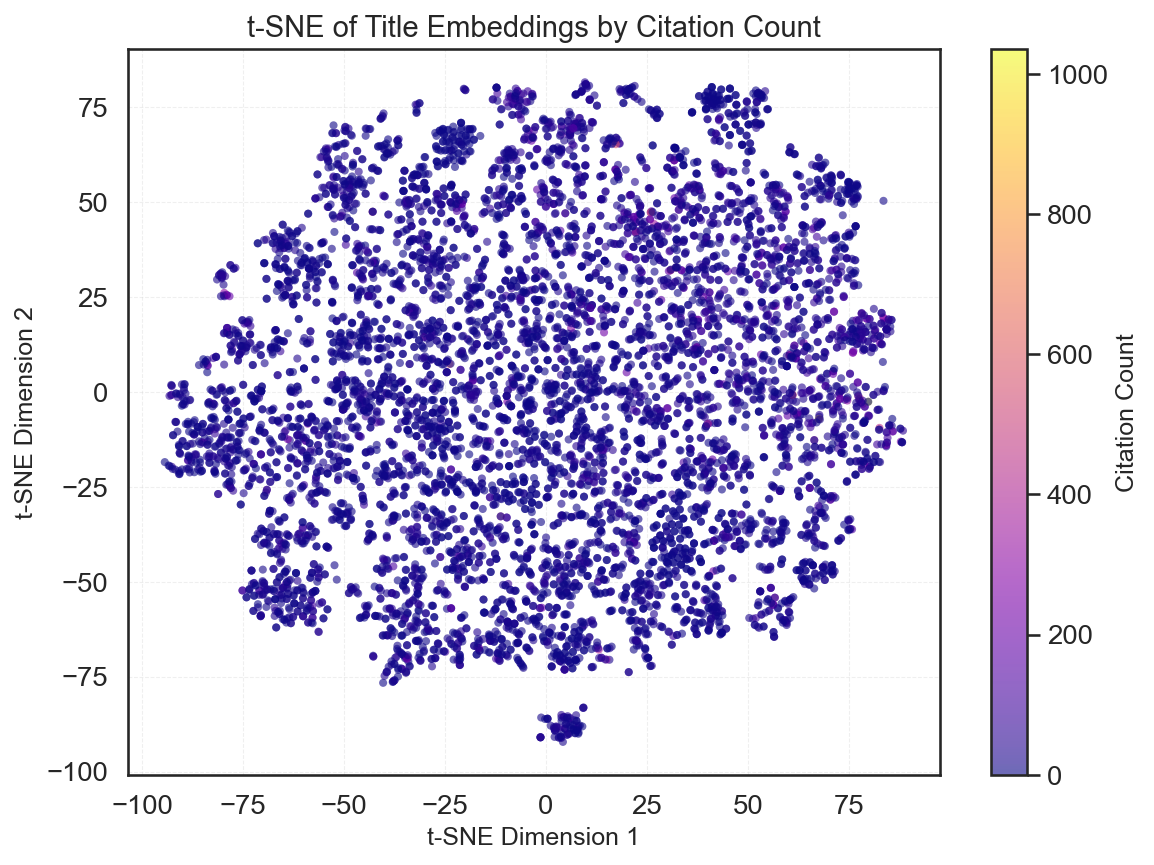

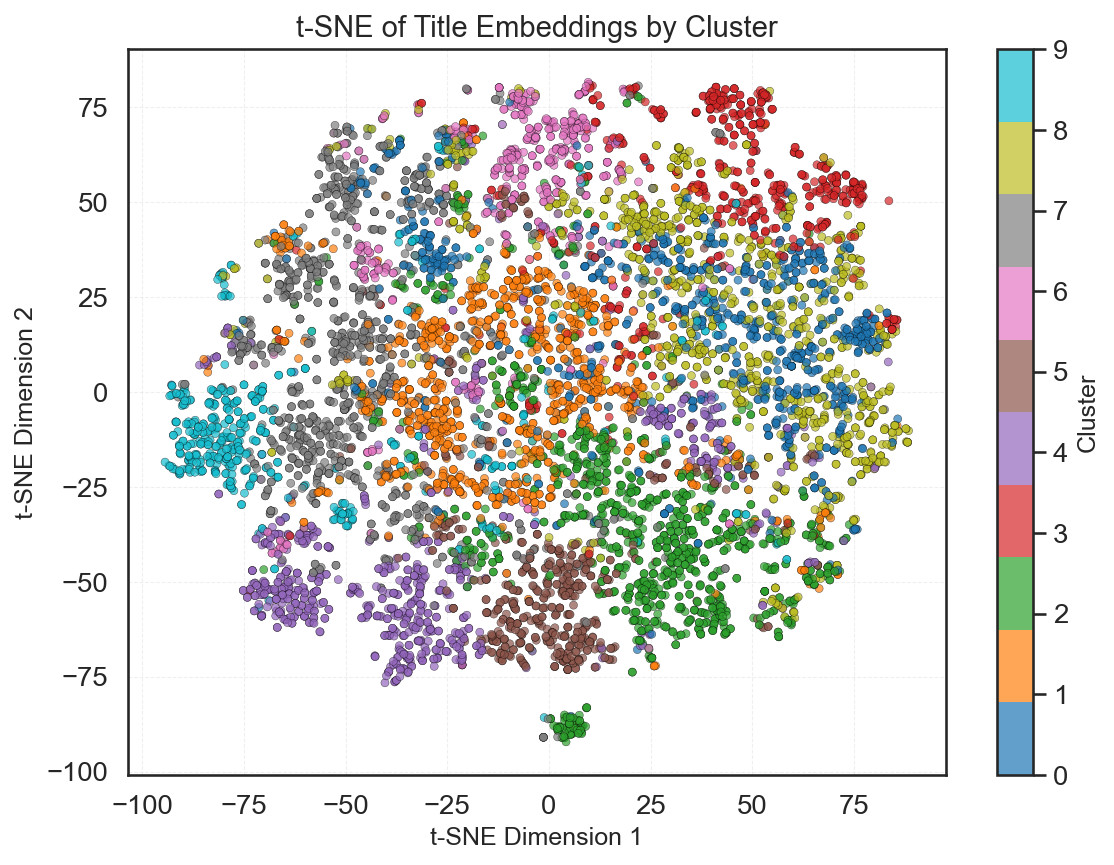

In [24]:
# Ensure numeric types for plotting
title_df["year"] = pd.to_numeric(title_df["year"], errors="coerce")
title_df["citation_count"] = pd.to_numeric(title_df["citation_count"], errors="coerce")
title_df["cluster"] = pd.to_numeric(title_df["cluster"], errors="coerce")

# Remove rows where 'x' or 'y' cannot be converted to float
def is_floatable(val):
    try:
        float(val)
        return True
    except:
        return False

title_df = title_df[title_df["x"].apply(is_floatable) & title_df["y"].apply(is_floatable)]


# Drop rows with NaNs in critical columns for plotting
plot_df = title_df.dropna(subset=["x", "y", "year", "citation_count", "cluster"])
import matplotlib.pyplot as plt
import seaborn as sns

# Set global plot style
sns.set(style="white", context="notebook", font_scale=1.2)
plt.rcParams.update({
    "figure.dpi": 150,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 10
})

# Plot 2: Title embeddings colored by citation count
plt.figure(figsize=(8, 6))
scatter_title_citation = plt.scatter(
    title_df["x"], title_df["y"],
    c=title_df["citation_count"],
    cmap="plasma",
    alpha=0.6,
    s=15,  # smaller points
    edgecolors='none'
)
plt.colorbar(scatter_title_citation, label="Citation Count")
plt.title("t-SNE of Title Embeddings by Citation Count")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 3: Title embeddings colored by cluster
plt.figure(figsize=(8, 6))
scatter_title_cluster = plt.scatter(
    title_df["x"], title_df["y"],
    c=title_df["cluster"],
    cmap="tab10",
    alpha=0.7,
    s=15,
    edgecolors='black',
    linewidth=0.2
)
plt.colorbar(scatter_title_cluster, label="Cluster")
plt.title("t-SNE of Title Embeddings by Cluster")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

In [28]:
abstract_df = abstract_df.T
abstract_df = abstract_df[abstract_df["x"].apply(is_floatable) & abstract_df["y"].apply(is_floatable)]

In [30]:
# Ensure citation_count is numeric
abstract_df["citation_count"] = pd.to_numeric(abstract_df["citation_count"], errors="coerce")

# Drop rows with missing citation counts
abstract_df_binned = abstract_df.dropna(subset=["citation_count"]).copy()

# Bin citation counts into 5 quantile-based buckets
abstract_df_binned["citation_bucket"], bucket_labels = pd.qcut(
    abstract_df_binned["citation_count"],
    q=5,
    labels=["Very Low", "Low", "Medium", "High", "Very High"],
    retbins=True,
    duplicates="drop"
)

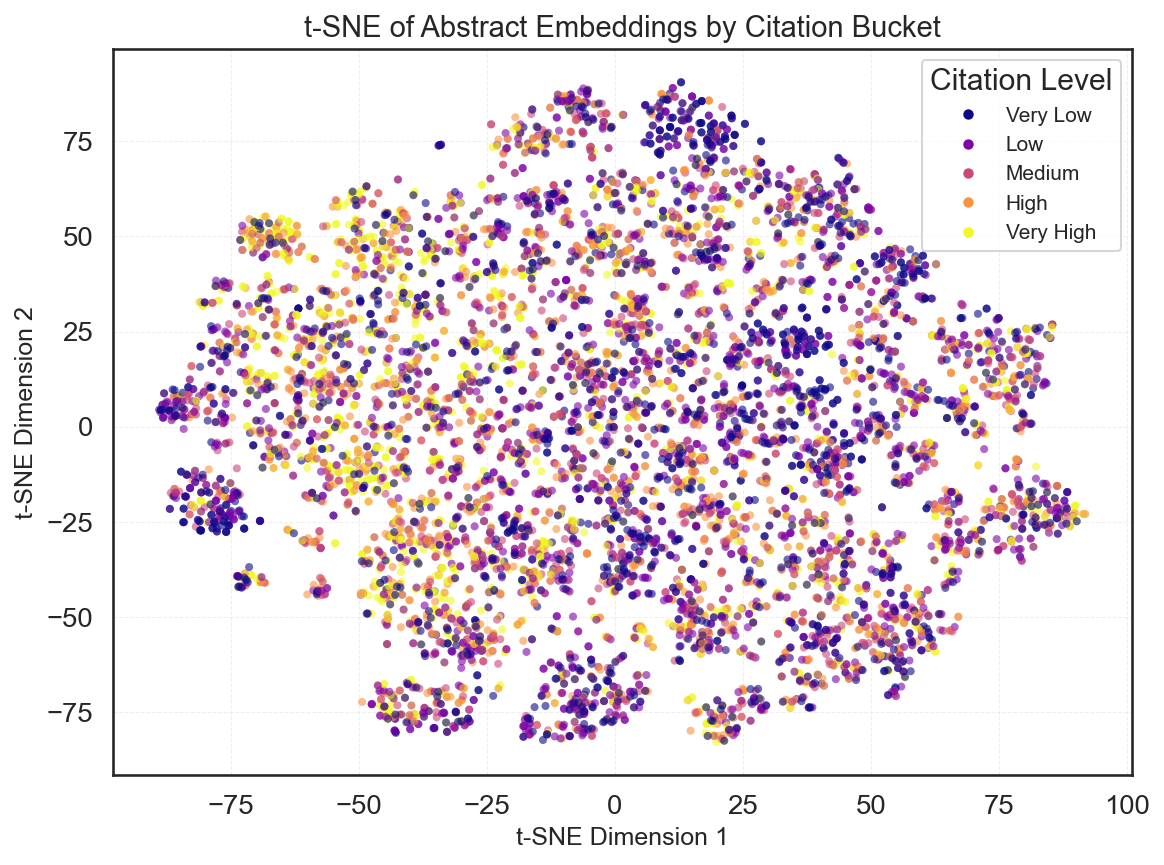

In [31]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

# Set plot aesthetics
sns.set(style="white", context="notebook", font_scale=1.2)
plt.rcParams.update({
    "figure.dpi": 150,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 10
})

# Plot citation bucket with custom legend
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    abstract_df_binned["x"], abstract_df_binned["y"],
    c=abstract_df_binned["citation_bucket"].astype("category").cat.codes,
    cmap="plasma",
    s=15,
    alpha=0.6,
    edgecolors="none"
)

# Build legend manually
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=label,
           markerfacecolor=plt.cm.plasma(i / 4), markersize=6)
    for i, label in enumerate(abstract_df_binned["citation_bucket"].cat.categories)
]
plt.legend(handles=legend_elements, title="Citation Level", loc="upper right")

plt.title("t-SNE of Abstract Embeddings by Citation Bucket")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()


In [32]:

# Validation: Compare clustering similarity between title and abstract embeddings

# Method 1: Calculate cluster overlap (how often title and abstract from same paper fall in same cluster)
cluster_matching = sum(1 for i in range(len(title_clusters)) if title_clusters[i] == abstract_clusters[i])
cluster_matching_percentage = (cluster_matching / len(title_clusters)) * 100
print(f"Percentage of documents with matching clusters between title and abstract: {cluster_matching_percentage:.2f}%")

Percentage of documents with matching clusters between title and abstract: 15.13%


Average cosine similarity between title and abstract embeddings: 0.7085


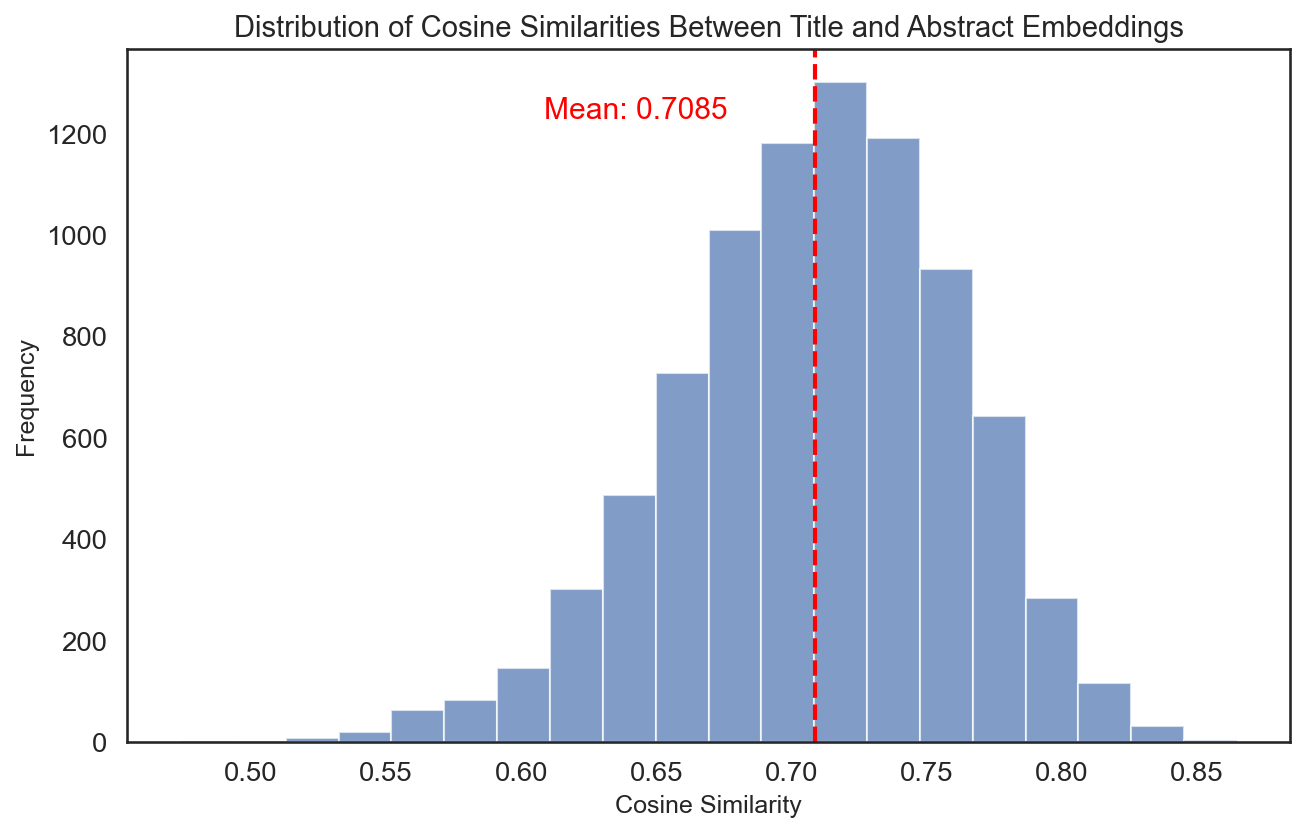

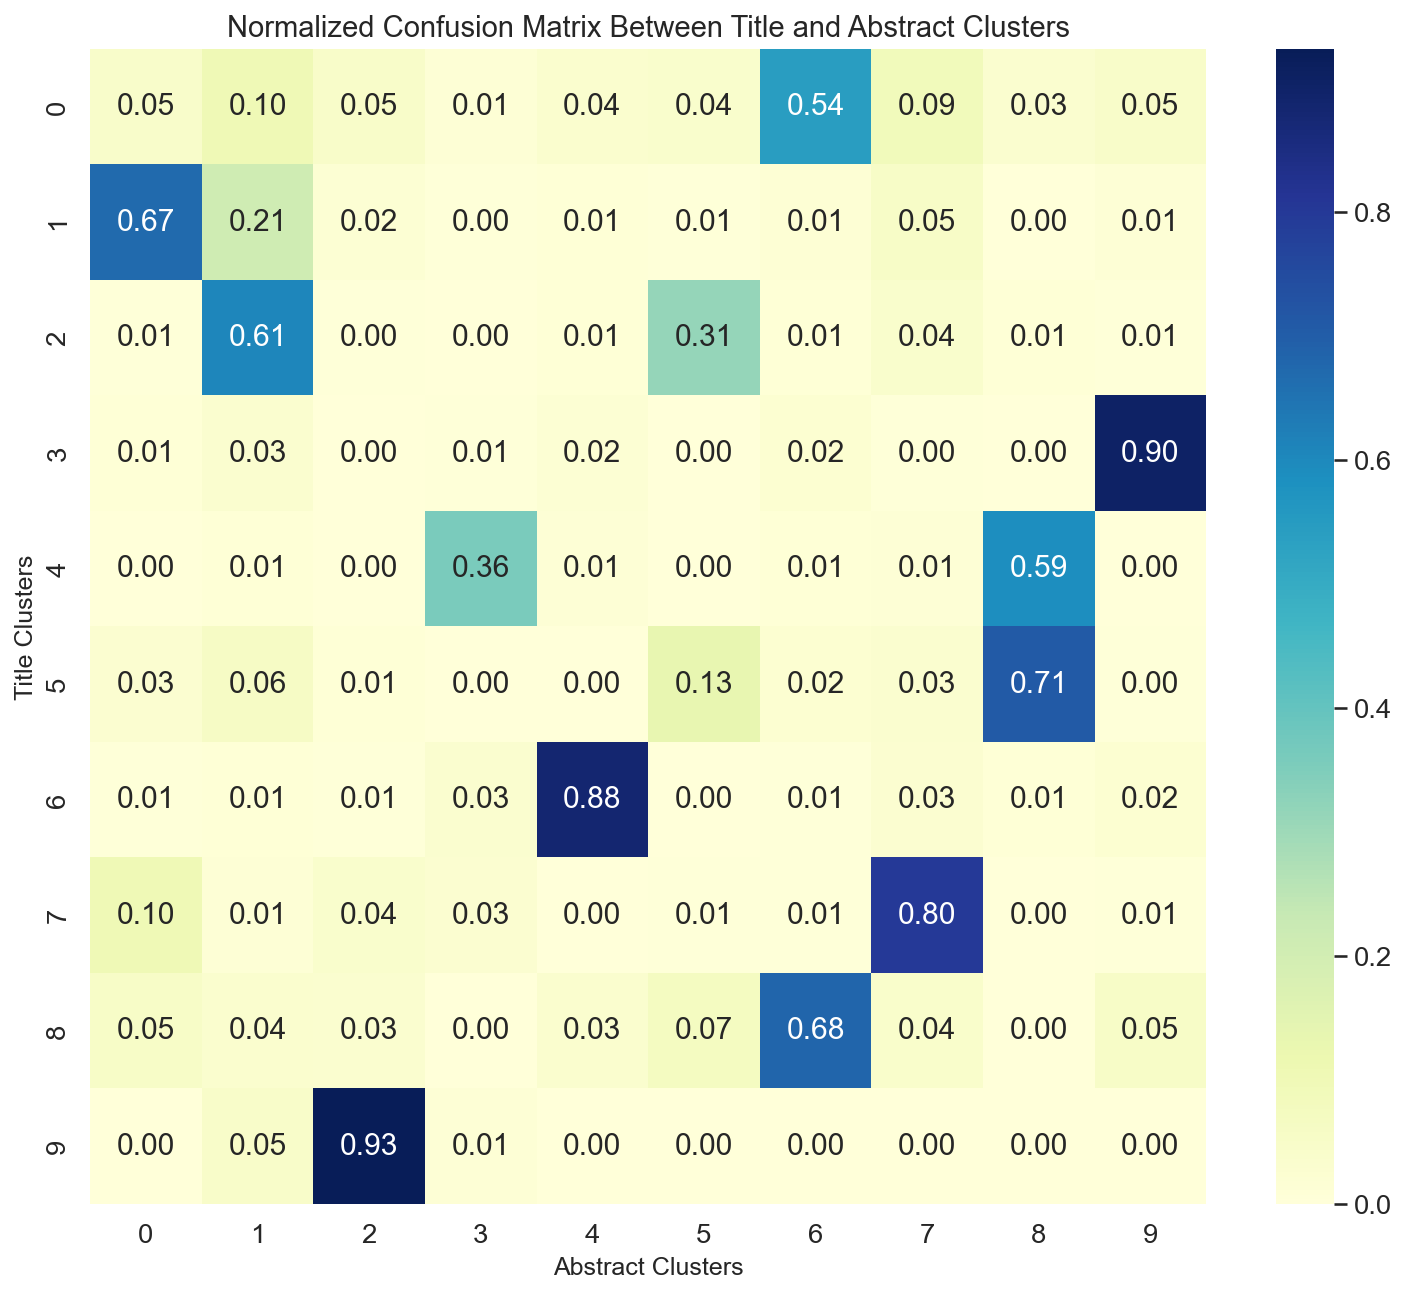

In [33]:

# Method 2: Calculate cosine similarity between title and abstract embeddings
similarities = []
for i in range(len(title_embeddings)):
    title_emb = title_embeddings[i]
    abstract_emb = abstract_embeddings[i]
    # Reshape to 2D arrays for sklearn cosine_similarity
    similarity = cosine_similarity([title_emb], [abstract_emb])[0][0]
    similarities.append(similarity)

average_similarity = np.mean(similarities)
print(f"Average cosine similarity between title and abstract embeddings: {average_similarity:.4f}")

# Plot similarity distribution
plt.figure(figsize=(10, 6))
plt.hist(similarities, bins=20, alpha=0.7)
plt.axvline(average_similarity, color='red', linestyle='dashed', linewidth=2)
plt.text(average_similarity-0.1, plt.ylim()[1]*0.9, f'Mean: {average_similarity:.4f}', color='red')
plt.title("Distribution of Cosine Similarities Between Title and Abstract Embeddings")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.show()

# Create a confusion matrix to visualize cluster agreement
confusion_matrix = np.zeros((10, 10))
for i in range(len(title_clusters)):
    title_cluster = title_clusters[i]
    abstract_cluster = abstract_clusters[i]
    confusion_matrix[title_cluster, abstract_cluster] += 1

# Normalize by row (title clusters)
row_sums = confusion_matrix.sum(axis=1).reshape(-1, 1)
normalized_confusion_matrix = confusion_matrix / row_sums

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(normalized_confusion_matrix, annot=True, cmap="YlGnBu", fmt=".2f",
            xticklabels=range(10), yticklabels=range(10))
plt.title("Normalized Confusion Matrix Between Title and Abstract Clusters")
plt.xlabel("Abstract Clusters")
plt.ylabel("Title Clusters")
plt.show()